In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
video_games = pd.read_csv("VGSales.csv")

*Sadie*

In [3]:
sales_publisher = video_games.loc[:, ["Global_Sales", "Publisher"]]
sales_publisher.describe()

,Global_Sales
count,6536.000000
mean,0.717916
std,1.856836
min,0.010000
25%,0.110000
50%,0.290000
75%,0.730000
max,82.530000


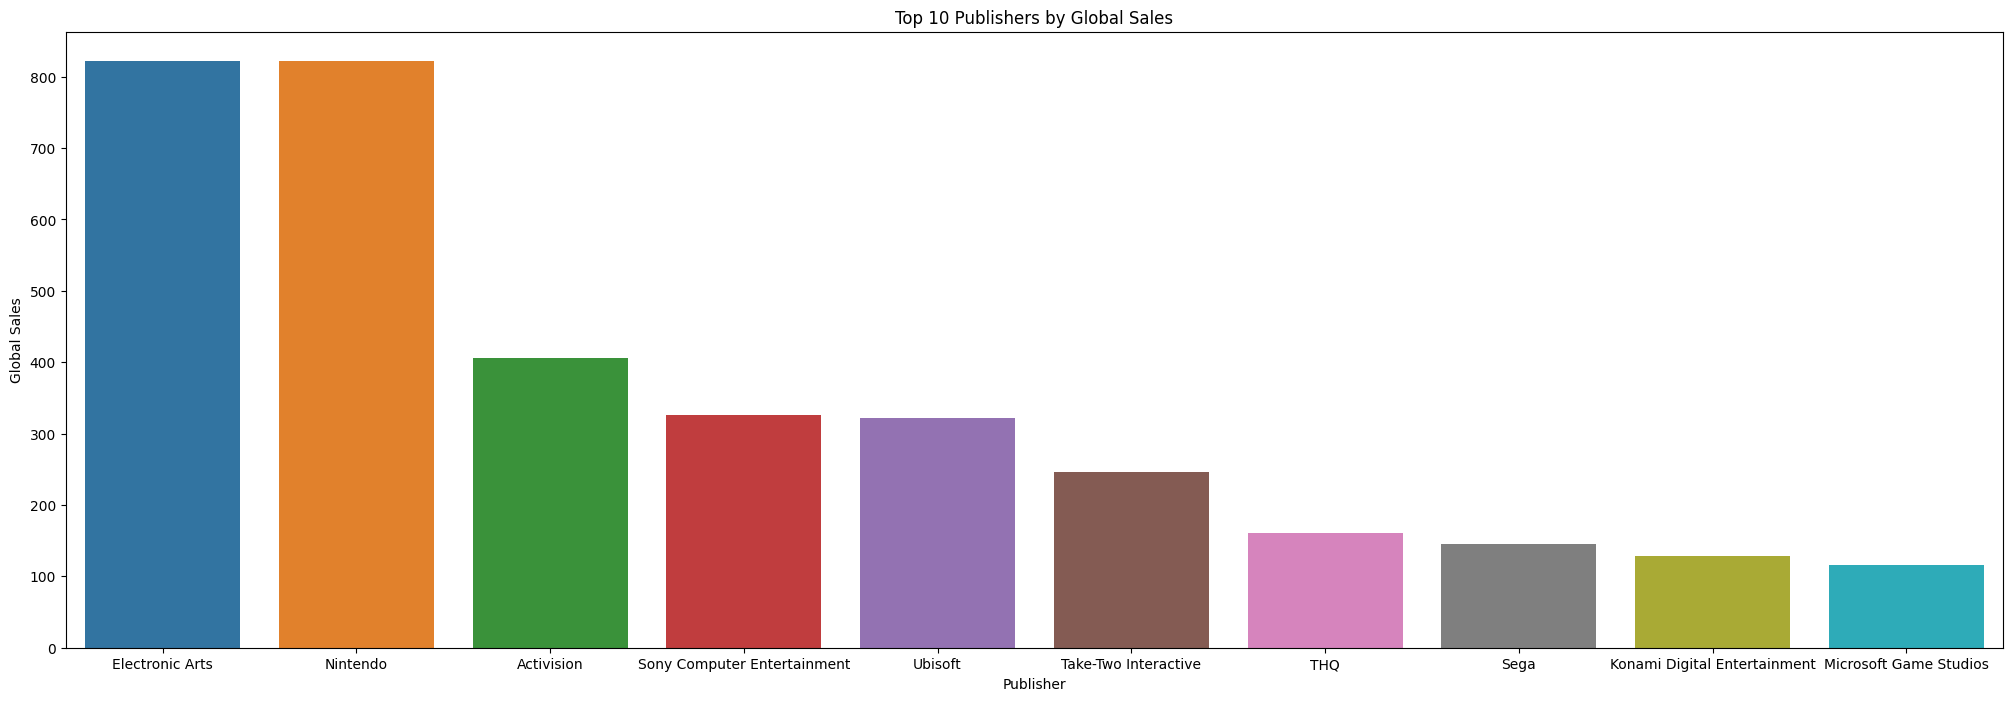

Minimum Global Sales: 0.01
Maximum Global Sales: 82.53
Mean:  0.9622418066648306
Median:  0.42
Range:  82.52


In [4]:
#specify by size
plt.figure(figsize=(25, 8))

#calculate the sum of 'Global_Sales' for each 'Publisher'
#Use .nlargest(10) method to retrieve the top 10 publishers with the highest global sales
publisher_sales = video_games.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

#Use seaborn's barplot function to generate vertical bars for each publisher
sns.barplot(x = publisher_sales.index, y = publisher_sales.values)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()

top_publishers = video_games[video_games['Publisher'].isin(publisher_sales.index)]

min_global_sales = top_publishers['Global_Sales'].min()
max_global_sales = top_publishers['Global_Sales'].max()

print('Minimum Global Sales:', min_global_sales)
print('Maximum Global Sales:', max_global_sales)

mean_sales = top_publishers['Global_Sales'].mean()
median_sales = top_publishers['Global_Sales'].median()
range_sales = top_publishers['Global_Sales'].max() - top_publishers['Global_Sales'].min()

print("Mean: ", mean_sales)
print("Median: ", median_sales)
print("Range: ", range_sales)

*Blair*

In [6]:
vgsales = pd.read_csv("VGSales.csv")

In [ ]:
gcs = pd.DataFrame ({
    'Genre': vgsales['Genre'],
    'North America': vgsales['NA_Sales'],
    'Europe': vgsales['EU_Sales'],
    'Japan': vgsales['JP_Sales']
})

gcs

,Genre,North America,Europe,Japan
0,Sports,41.36,28.96,3.77
1,Racing,15.68,12.76,3.79
2,Sports,15.61,10.93,3.28
3,Platform,11.28,9.14,6.50
4,Misc,13.96,9.18,2.93
...,...,...,...,...
6531,Action,0.00,0.01,0.00
6532,Fighting,0.01,0.00,0.00
6533,Action,0.00,0.01,0.00
6534,Shooter,0.01,0.00,0.00


In [ ]:
'''
This kernal specifies the unique categories for genre 
within the Video Game Sales Database.
'''

genre = gcs['Genre'].unique()
genre

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
'''
This kernal groups the total sales of each geographical location
by the genre and combines the results into
one dataframe.
'''
naSales = pd.DataFrame(gcs.groupby('Genre')['North America'].sum())
euSales = pd.DataFrame(gcs.groupby('Genre')['Europe'].sum())
jpSales = pd.DataFrame(gcs.groupby('Genre')['Japan'].sum())
genreSales = pd.concat([naSales, euSales, jpSales], axis=1)
# genreSales = pd.concat([naSales, euSales, jpSales], axis=0) # example of why the axis is important/necessary

genreSales

,North America,Europe,Japan
Genre,,,
Action,503.47,316.88,69.87
Adventure,35.46,21.29,8.54
Fighting,135.12,60.07,27.85
Misc,216.32,118.42,33.18
Platform,180.62,100.77,40.74
Puzzle,33.16,24.02,14.98
Racing,219.93,161.71,27.66
Role-Playing,177.89,80.13,118.62
Shooter,306.19,182.73,13.22


The bar plot below exhibits the total amount of sales in each geographical location (North America, Europe, and Japan) based on the genre of game.
The action and sports games sold at a significantly higher rate than the other genres in North America and Europe with the shooter genre selling the 3rd most in both countries.
Japan's most popular genre, based on sales, was role-playing followed by action then platform. 
Additionally, North America had the highest amount of sales in all genres.
Europe had the second highest amount of sales in genres with the exception of role-playing, in which Japan had the second highest amount.

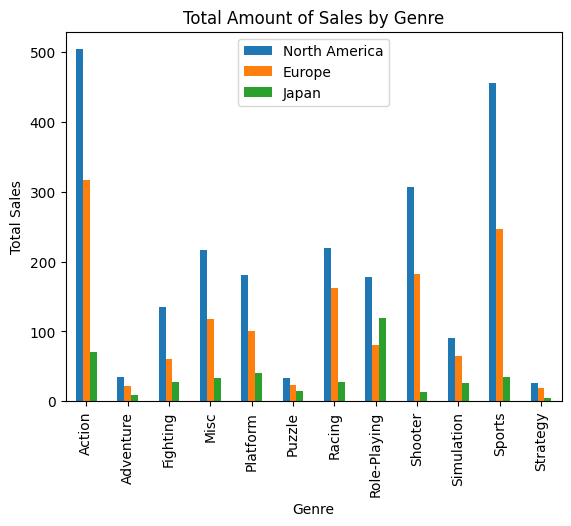

In [ ]:
genreSales.plot(kind='bar')
plt.title('Total Amount of Sales by Genre')
plt.ylabel('Total Sales')
plt.show()

The plot below shows matching results for the bar graph above in a Kernel Density Estimate(KDE) format.

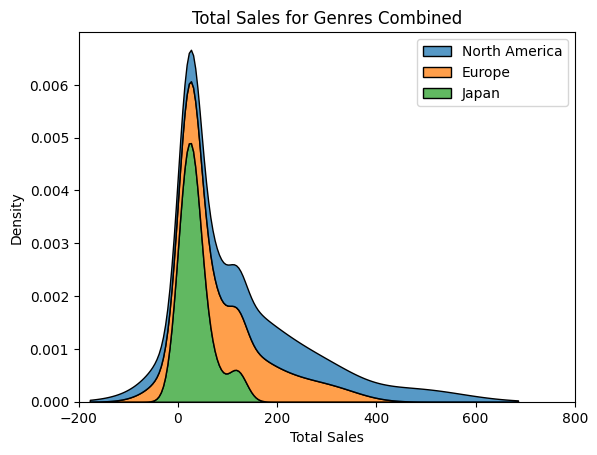

In [ ]:
'''
This kernal exhibits the results of the
previous kernal in a KDE plot to display the 
sales of each geographical location by genre.
'''
sns.kdeplot(genreSales, multiple='stack').set(title='Total Sales for Genres Combined', xlabel='Total Sales')
plt.xlim(-200, 800)

plt.show()

The bar plot below displays the range in sales for each geographical location (North America, Europe, and Japan).
North America had the greatest range of sales with a minimum of 25.98 and a maximum of 503.47 resulting in a range of 477.99.
Europe's range of sales followed behind North America's with a minimum of 19.62 and a maximum of 316.88 resulting in a range of 297.26.
Lastly, Japan recorded a minimum of 4.30 and a maximum of 118.62 resulting in a range of 114.32.

North America    477.49
Europe           297.26
Japan            114.32
dtype: float64

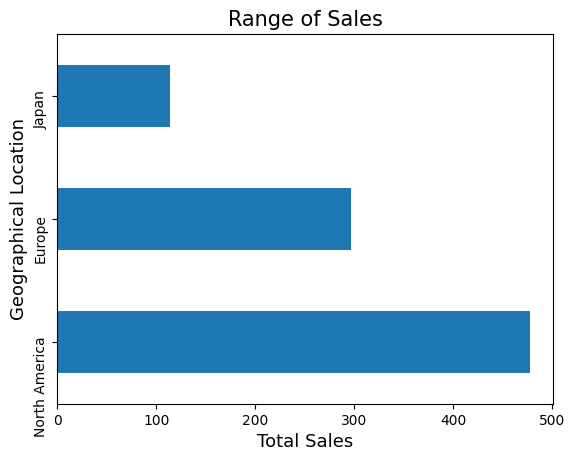

In [ ]:
# SALES RANGE FOR EACH GEOGRAPHICAL LOCATION

'''
This kernal calculates the range of sales for each geographical location.
'''

# genreSales.max()
# North America    503.47
# Europe           316.88
# Japan            118.62

# genreSales.min()
# North America    25.98
# Europe           19.62
# Japan             4.30

gcsRange = genreSales.max() - genreSales.min()
gcsRange
gcsRange.plot(kind='barh')
plt.title('Range of Sales', size=15)
plt.xlabel('Total Sales', size=13)
plt.ylabel('Geographical Location', size=13)
plt.yticks(rotation=90)
gcsRange

In [ ]:
naV = statistics.variance(gcs['North America'])
eV = statistics.variance(gcs['Europe'])
jV = statistics.variance(gcs['Japan'])

gcsVariance = [naV, eV, jV]
gcsVariance

[0.8050487911434429, 0.4184643375867071, 0.08467205247331243]

The scatter plot below displays the variance for each geographical location:

North America- 0.8050487911434429

Europe- 0.4184643375867071

Japan- 0.08467205247331243

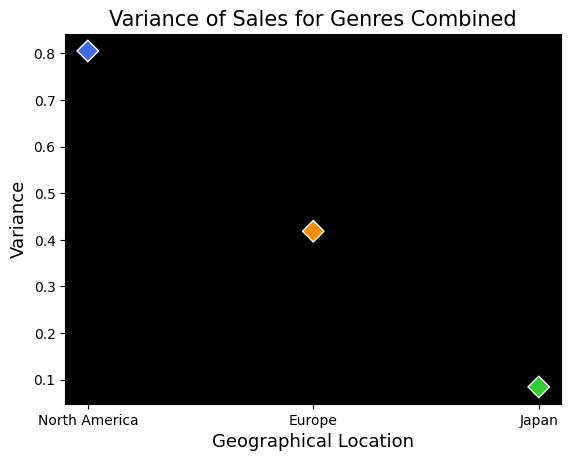

In [ ]:
'''
This kernal exhibits the results of the
previous kernal in a scatter plot to display the 
variance of sales for each geographical location by genre.
'''

markerSize= 120
axes = plt.axes()
plt.scatter(x=['North America', 'Europe', 'Japan'], y=gcsVariance,color=('royalblue', 'darkorange', 'limegreen'), edgecolor='white', marker='D', s=markerSize)
plt.title("Variance of Sales for Genres Combined", size=15)
plt.xlabel('Geographical Location', size=13)
plt.ylabel('Variance', size=13)
axes.set_facecolor('black')

In [ ]:
genreSales.mean()

North America    198.275000
Europe           116.379167
Japan             34.970000
dtype: float64

The violin plot below displays the average amount of sales for each geographical location with genres combined. The white dot displayed on the black rectangle marks the average amount on the plot.

North America had an average of 198.28

Europe had an average of 116.38

Japan had an average of 34.97

North America    198.275000
Europe           116.379167
Japan             34.970000
dtype: float64

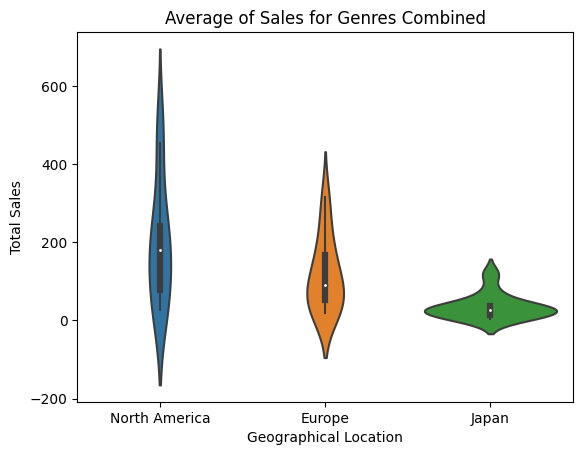

In [ ]:
gcsMean = genreSales.mean()
sns.violinplot(data=genreSales).set(title='Average of Sales for Genres Combined', xlabel='Geographical Location', ylabel='Total Sales')
gcsMean

The histogram plot below exhibits the total amount of sales in each geographical location with the genres combined.
Each colored box on the plot represents the percentage (relative frequency) of sales within that container.

For example:

The blue box in the bottom right corner of the plot represents North America having about 2.5% sales around the amount of 500.

[Text(0.5, 1.0, 'Total Sales for Genres Combined'),
 Text(0.5, 0, 'Total Sales'),
 Text(0, 0.5, 'Container Count')]

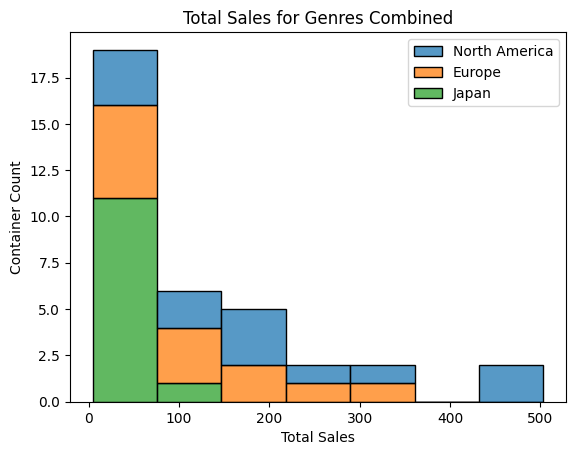

In [ ]:
sns.histplot(genreSales, multiple='stack').set(title='Total Sales for Genres Combined', xlabel='Total Sales', ylabel='Container Count')

The distribution plot below exhibits the total amount of sales in each geographical location with the genres combined.
Each colored box on the plot represents the variation in data distribution of sales within that container.

For example:

The blue box in the bottom right corner of the plot represents North America having a varition of about 2 around the amount of 500.

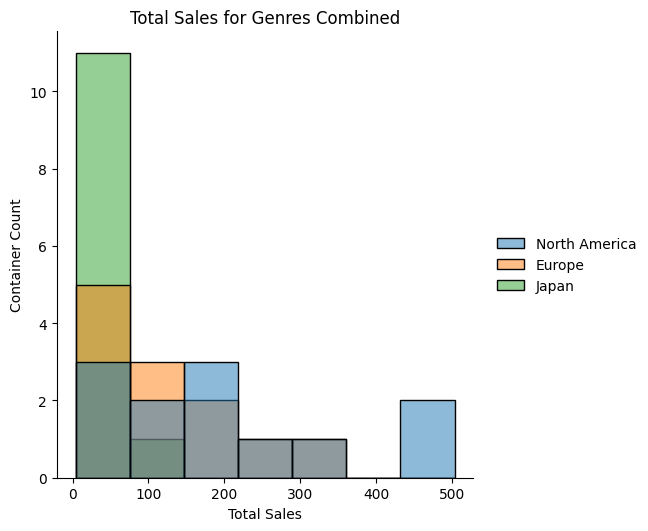

In [ ]:
sns.displot(genreSales).set(title='Total Sales for Genres Combined', xlabel='Total Sales', ylabel='Container Count')

*Tangi*

*Line Graph of Genres and their sales through the years*

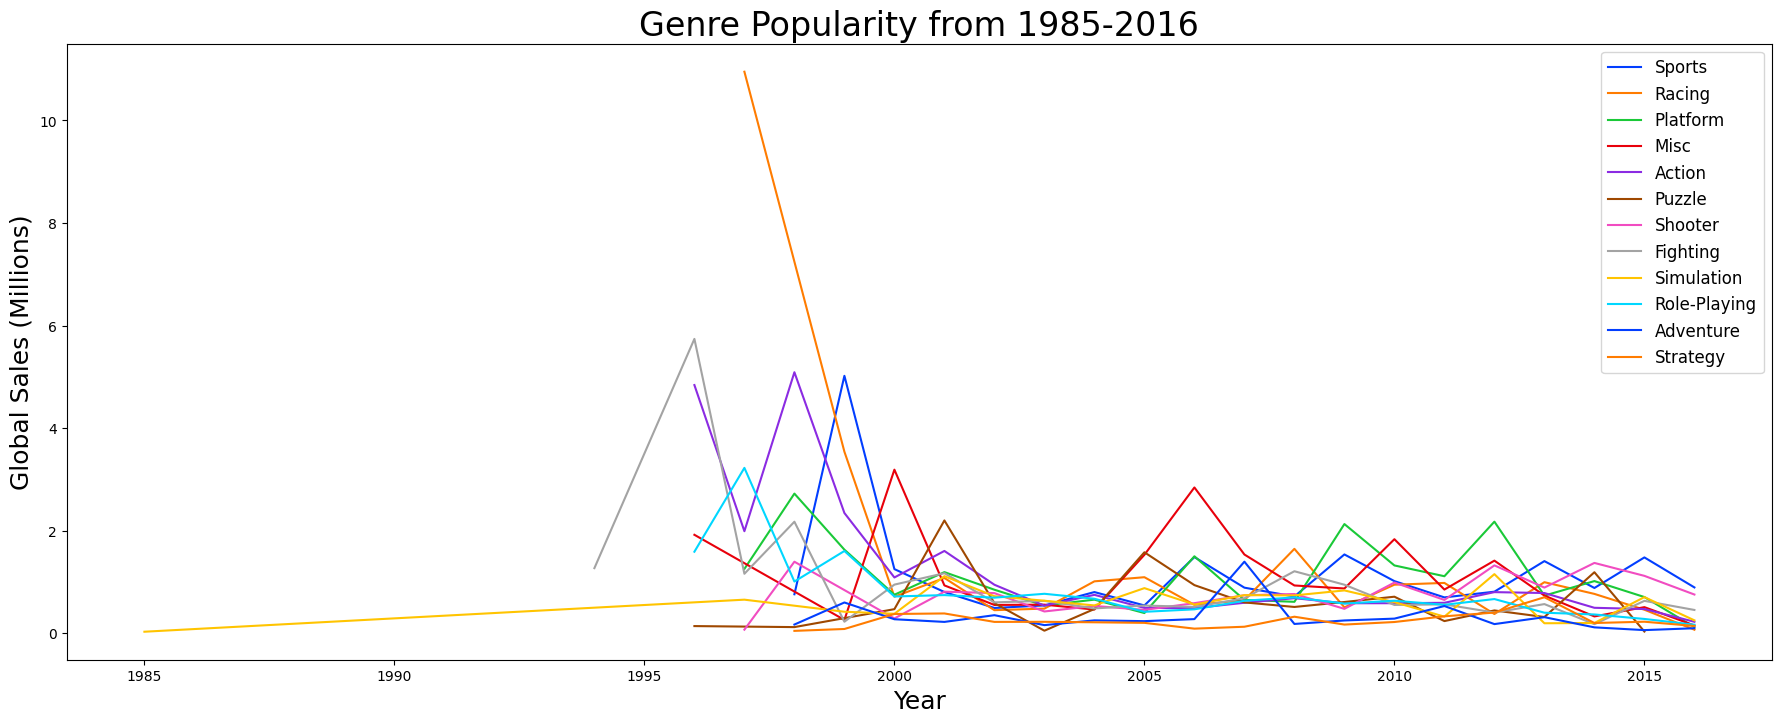

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.lineplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Genre', data = video_games.reset_index(), err_style=None, palette='bright')
ax.figure.set_size_inches(22, 8)
ax.set_title('Genre Popularity from 1985-2016', fontsize=24)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Global Sales (Millions)', fontsize=18)
plt.legend(loc = 'upper right', fontsize = 12)
plt.show()

*Top Platforms (Globally)*

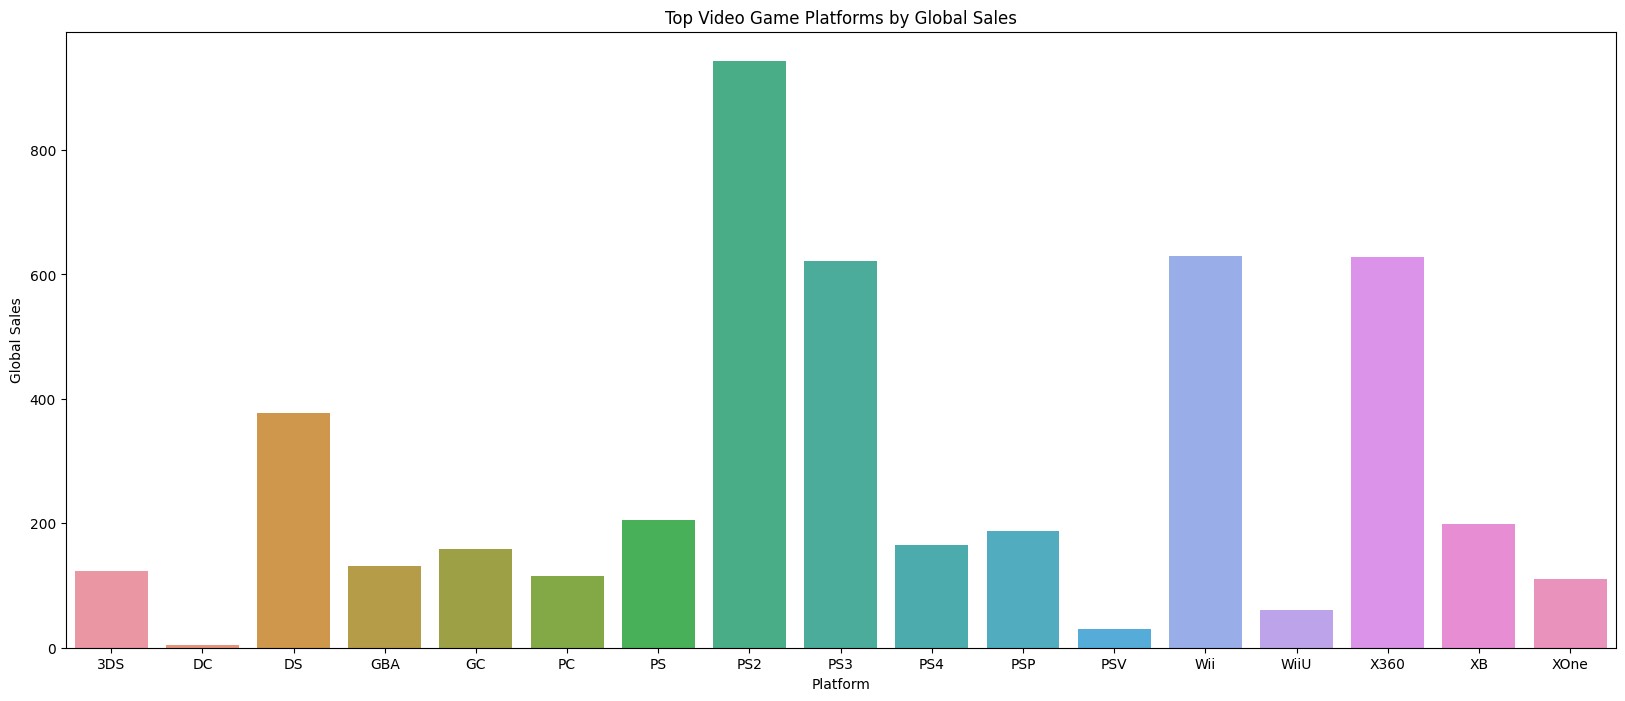

In [ ]:
platforms = video_games.groupby('Platform')['Global_Sales'].sum()
plt.figure(figsize=(20, 8))
sns.barplot(x = platforms.index, y = platforms.values)
plt.title('Top Video Game Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

# *Time Periods*

First let's create seperate dataframes for each of the following time periods:

--> 1990-1999

--> 2000-2009

--> 2010-2016

*We will not make a dataframe from before 1990, as there is only one record with a Year_of_Release before 1990 in the original Video Games dataframe.*

In [ ]:
video_games.loc[video_games["Year_of_Release"] < 1990]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6132,Alter Ego,PC,1985.0,Simulation,Activision,0.0,0.03,0.0,0.01,0.03,59.0,9.0,5.8,19.0,"Viva Media, Viva Media, LLC",T


*As you can see above, there is only one Video Game in the dataframe that was released before 1990. Therefore there is no need to make a seperate dataframe for the 80s time period*

In [ ]:
# Create DF from 1990-1999
video_games90s = video_games.loc[(video_games["Year_of_Release"] >= 1990) & (video_games["Year_of_Release"] <= 1999)].copy()
video_games90s

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
22,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,96.0,16.0,8.7,138.0,Polyphony Digital,E
27,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T
28,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49,93.0,23.0,9.0,135.0,Polyphony Digital,T
39,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86,90.0,24.0,8.6,644.0,SquareSoft,T
47,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,Saiyuki: Journey West,PS,1999.0,Strategy,Tecmo Koei,0.03,0.02,0.00,0.00,0.05,73.0,9.0,7.1,9.0,Koei,E
5873,StarCraft,PC,1998.0,Strategy,Activision,0.00,0.04,0.00,0.01,0.05,88.0,15.0,9.1,813.0,Blizzard Entertainment,T
6089,Planescape: Torment,PC,1998.0,Role-Playing,Interplay,0.01,0.02,0.00,0.00,0.03,91.0,22.0,9.2,813.0,Black Isle Studios,T
6318,Homeworld,PC,1998.0,Strategy,Vivendi Games,0.00,0.02,0.00,0.00,0.02,93.0,20.0,9.0,326.0,Relic,E


In [ ]:
# Create DF from 2000-2009
video_games00s = video_games.loc[(video_games["Year_of_Release"] >= 2000) & (video_games["Year_of_Release"] < 2010)].copy()
video_games00s

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,Legacy of Kain: Defiance,PC,2003.0,Action,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,70.0,11.0,8.7,67.0,Nixxes Software,M
6527,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,80.0,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+
6528,Karnaaj Rally,GBA,2003.0,Racing,Jaleco,0.01,0.00,0.00,0.00,0.01,81.0,9.0,9.5,4.0,"Infinite Dreams, Paragon 5",E
6530,Hospital Tycoon,PC,2007.0,Strategy,Codemasters,0.00,0.01,0.00,0.00,0.01,51.0,8.0,3.8,29.0,Big Red Software,E10+


In [ ]:
# Create DF from 2010-2016
video_games10s = video_games.loc[video_games["Year_of_Release"] >= 2010].copy()
video_games10s

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
18,Mario Kart 7,3DS,2011.0,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
19,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63,88.0,58.0,6.4,1094.0,Treyarch,M
23,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,3.00,2.14,0.78,10.81,90.0,82.0,8.4,921.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E
6531,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.00,0.00,0.01,81.0,46.0,8.5,151.0,Shin'en,E
6533,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6534,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Now that we have our dataframes for each time period, let's create some plots and visualizations with them!

First we will create dataframes for each time period that contain a group by of each gaming platform and a sum of its Global Sales.

In [ ]:
platforms90 = video_games90s.groupby('Platform')['Global_Sales'].sum()
platforms90

Platform
DC      2.04
PC      1.80
PS    141.74
Name: Global_Sales, dtype: float64

In [ ]:
platforms00 = video_games00s.groupby('Platform')['Global_Sales'].sum()
platforms00

Platform
DC        2.51
DS      347.02
GBA     131.12
GC      159.10
PC       56.56
PS       63.91
PS2     942.44
PS3     257.05
PSP     168.31
Wii     527.00
X360    305.14
XB      198.25
Name: Global_Sales, dtype: float64

In [ ]:
platforms10 = video_games10s.groupby('Platform')['Global_Sales'].sum()
platforms10

Platform
3DS     123.21
DS       30.65
PC       57.12
PS2       0.59
PS3     365.02
PS4     165.01
PSP      19.07
PSV      30.88
Wii     102.33
WiiU     60.32
X360    323.38
XOne    110.70
Name: Global_Sales, dtype: float64

Now that we have those dataframes, we can start creating visualizations of the top selliing platforms from each time period

*Top Video Game Platforms by Global Sales from 1990-1999*

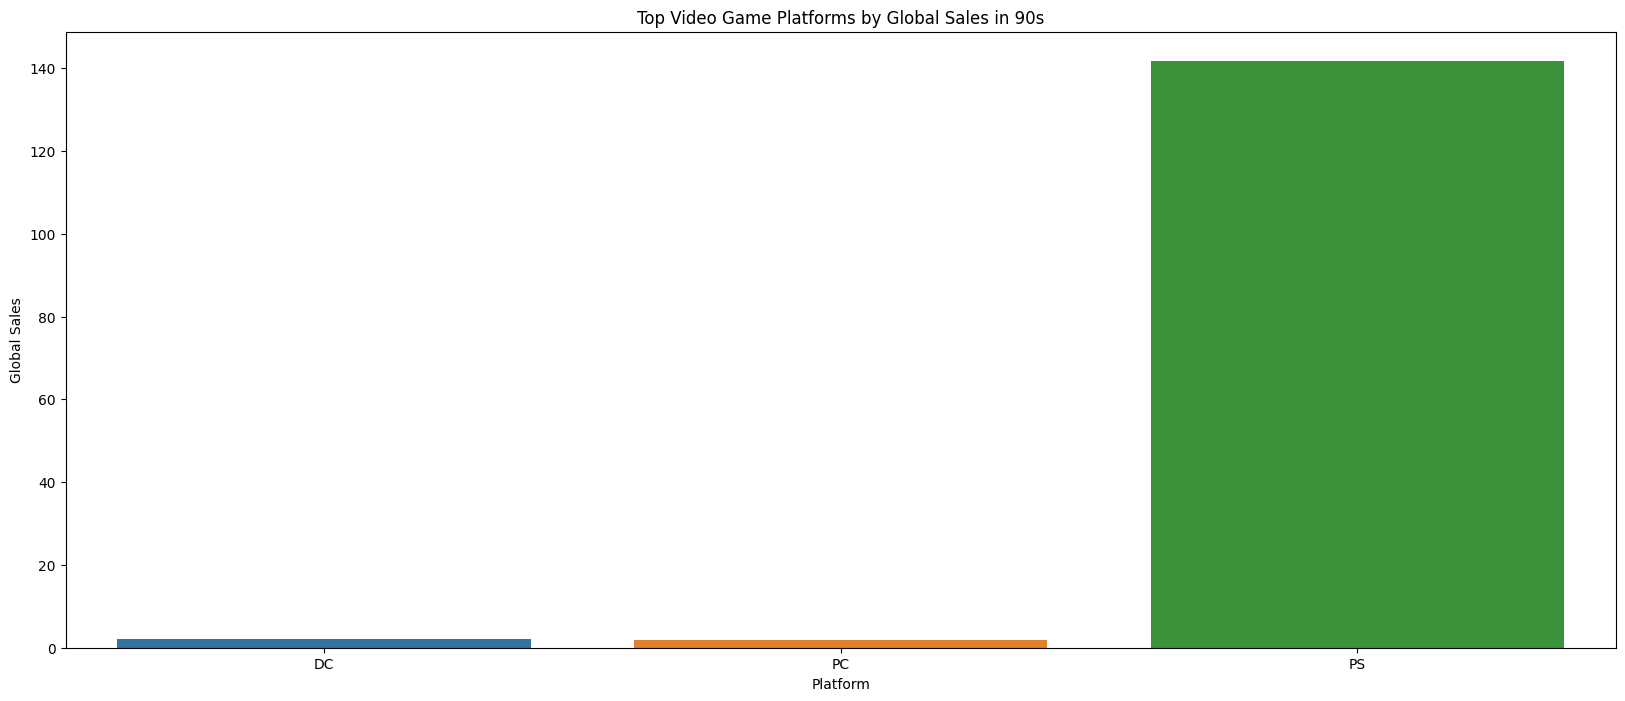

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x = platforms90.index, y = platforms90.values)
plt.title('Top Video Game Platforms by Global Sales in 90s')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()



As we can see by the bar graph above, out of the gaming platforms that were out in the 90s, the Playstation (PS) was by far the highest selling platform over the DC and the PC.

*Top Video Game Platforms by Global Sales from 2000-2009*

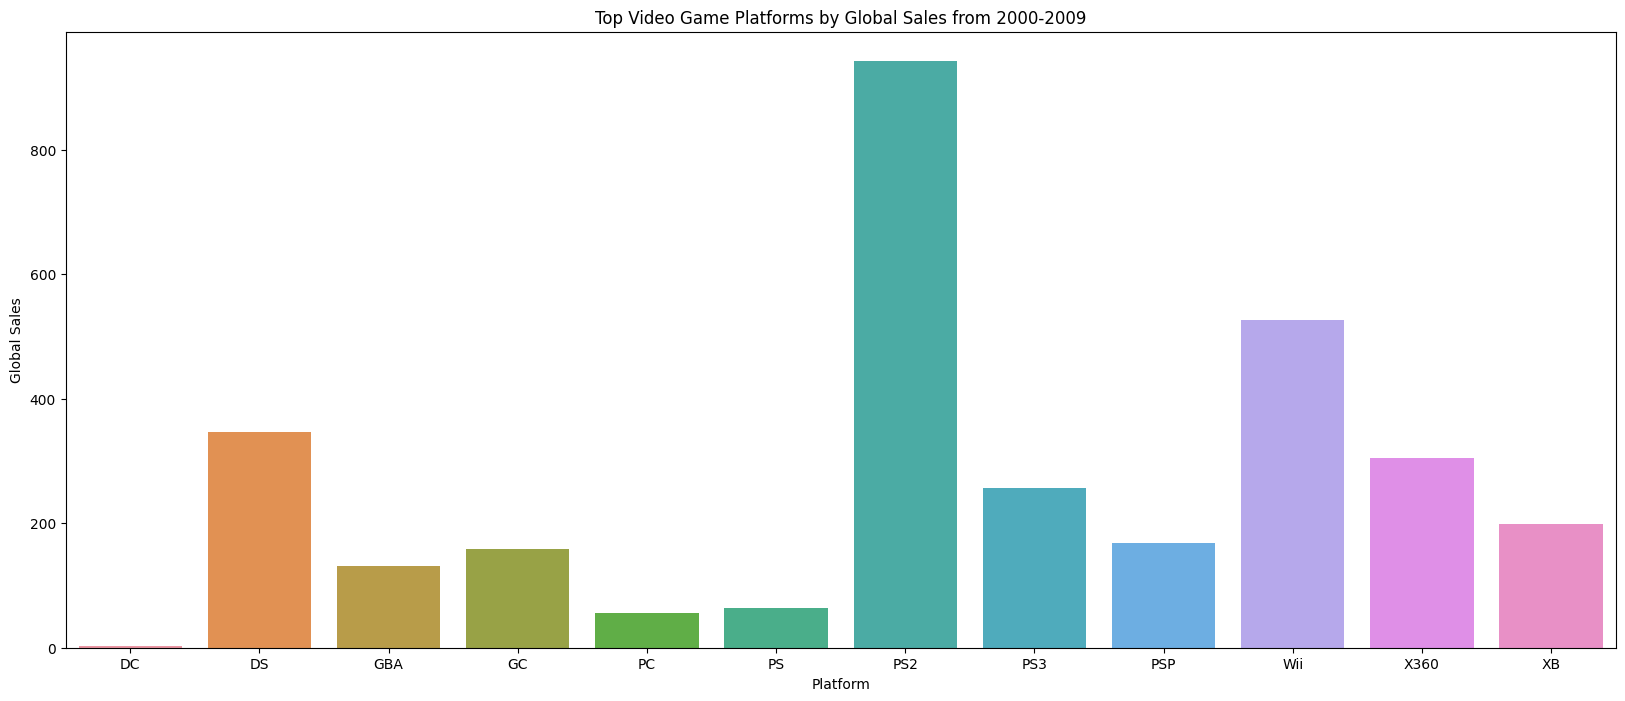

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x = platforms00.index, y = platforms00.values)
plt.title('Top Video Game Platforms by Global Sales from 2000-2009')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

In the 2000s, we saw an additional 9 gaming platforms enter the market: DS, GBA, GC, PS2, PS3, PSP, Wii, X360, and XB

Playstation held on to their reign with their sequel console, the Playstation 2 (PS2), durimg this time period. Following behind was the Wii and the DS.


*Top Video Game Platforms by Global Sales from 2010-2016*

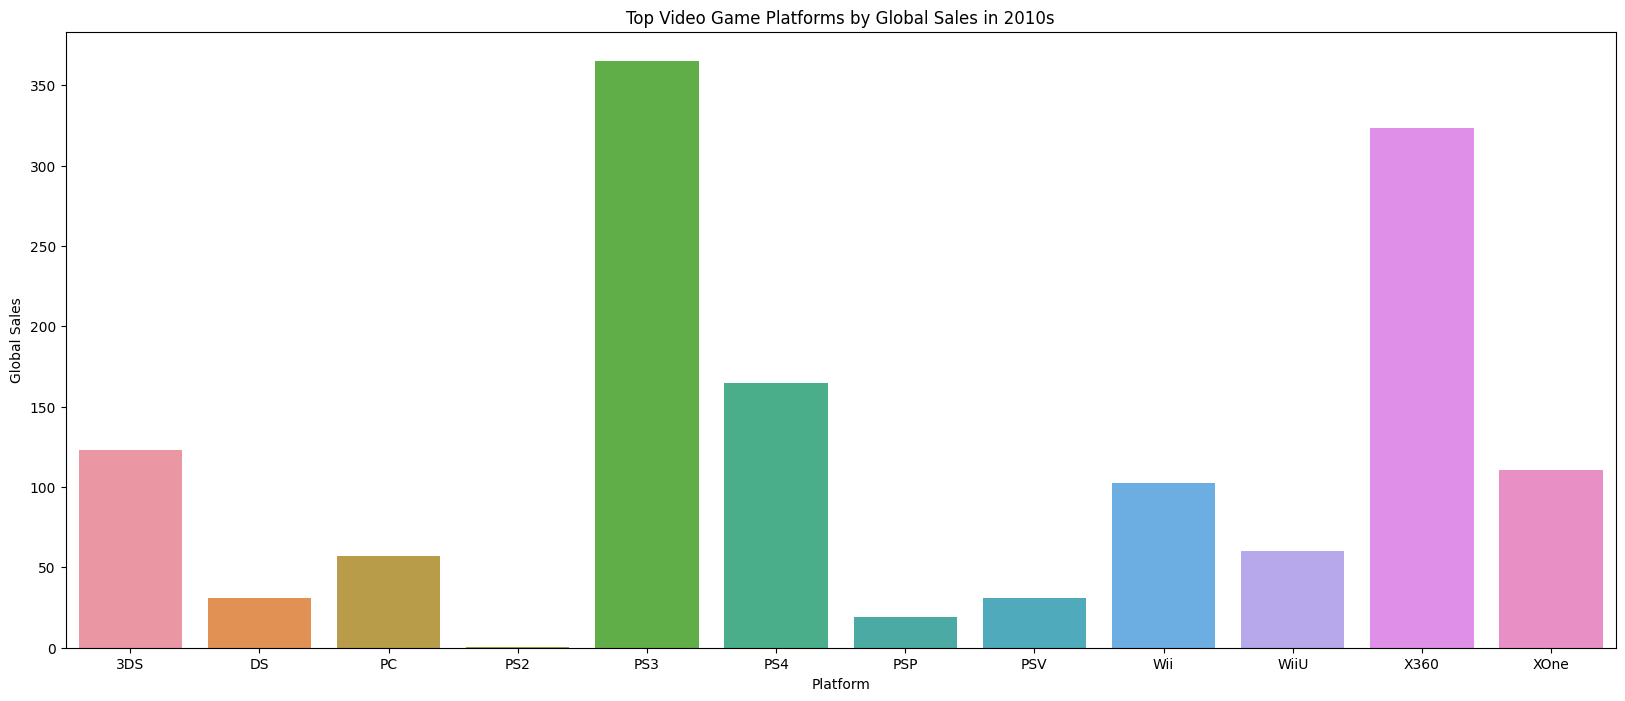

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x = platforms10.index, y = platforms10.values)
plt.title('Top Video Game Platforms by Global Sales in 2010s')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

In the 2010s, we saw another additional 5 gaming platforms enter the market: 3DS, PS4, PSP, PSV, WiiU, and XOne

Playstation, once again, held on to as the highest selling platform globally, this time with the Playstation 3 (PS3). Following right behind on its tail was the XBox 360, and the Playstation 4.

Now let's take a look at the top 10 games from each time period.

First we will create dataframes that hold these top 10 video games from each time period.

In [ ]:
# Top 10 video games from the 90s
top_10_90s = video_games90s[:10]

# Top 10 video games from the 2000s
top_10_00s = video_games00s[:10]

# Top 10 video games from the 2010s
top_10_10s = video_games10s[:10]

Now we can take a look at the Top 10 Video Games from each time period by Global Sales.

*We will also be categorizing them by Developer so we can get more insight on the data*

*Top 10 Highest Selling Games Globally in 90s*

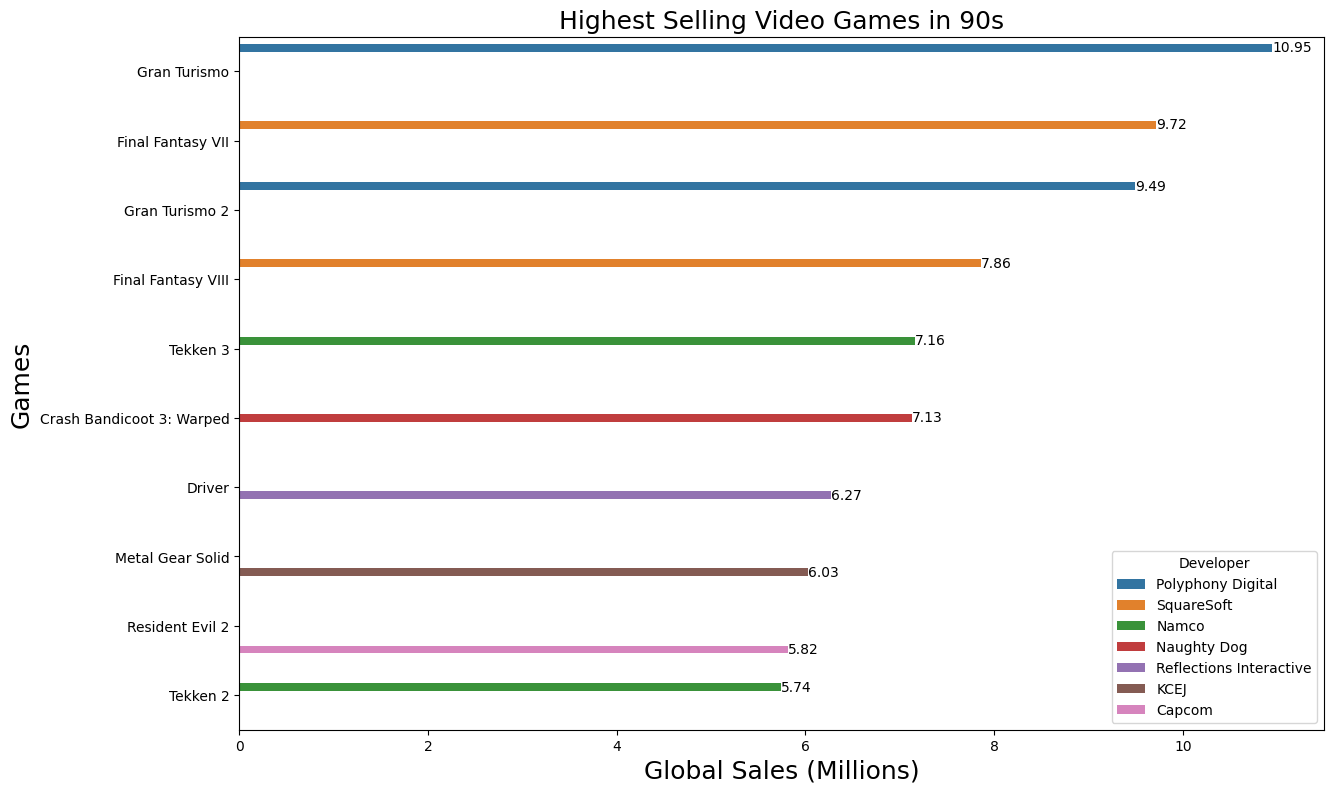

In [ ]:
ax = sns.barplot(x = 'Global_Sales', y = "Name", data = top_10_90s, hue= "Developer")
ax.figure.set_size_inches(14, 9)
ax.set_title("Highest Selling Video Games in 90s", fontsize = 18)
ax.set_ylabel('Games', fontsize = 18)
ax.set_xlabel('Global Sales (Millions)', fontsize = 18)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

*Top 10 Highest Selling Games Globally in 2000s*

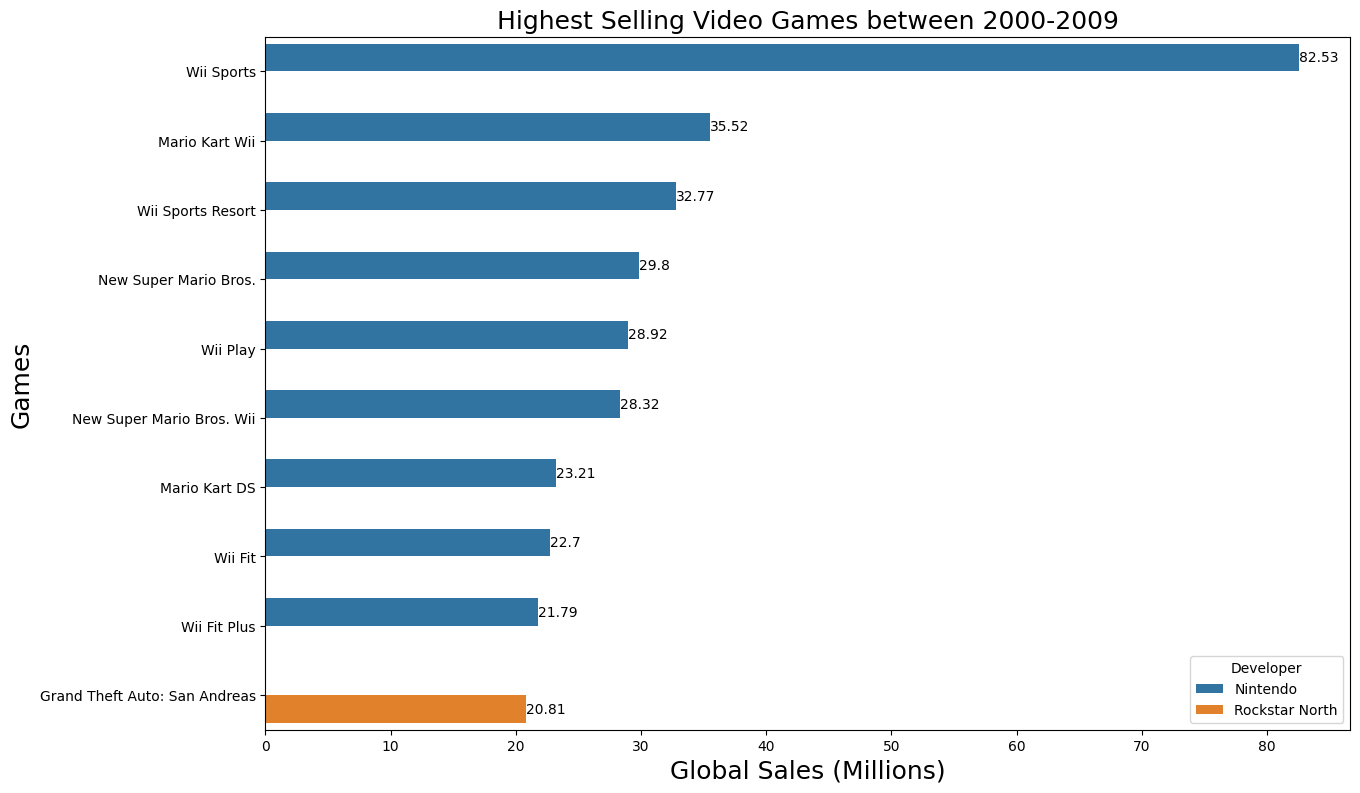

In [ ]:
ax = sns.barplot(x = 'Global_Sales', y = "Name", data = top_10_00s, hue= "Developer")
ax.figure.set_size_inches(14, 9)
ax.set_title("Highest Selling Video Games between 2000-2009", fontsize = 18)
ax.set_ylabel('Games', fontsize = 18)
ax.set_xlabel('Global Sales (Millions)', fontsize = 18)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The 2000s were completely dominated by games developed by Nintendo, taking up the first 9 spots of the Top 10 list and Wii Sports outsold all the other games by far.

Grand Theft Auto: San Andreas, developed by Rockstar North, was very close behind Wii Fit Plus.

*Top 10 Highest Selling Games Globally in 2010s*

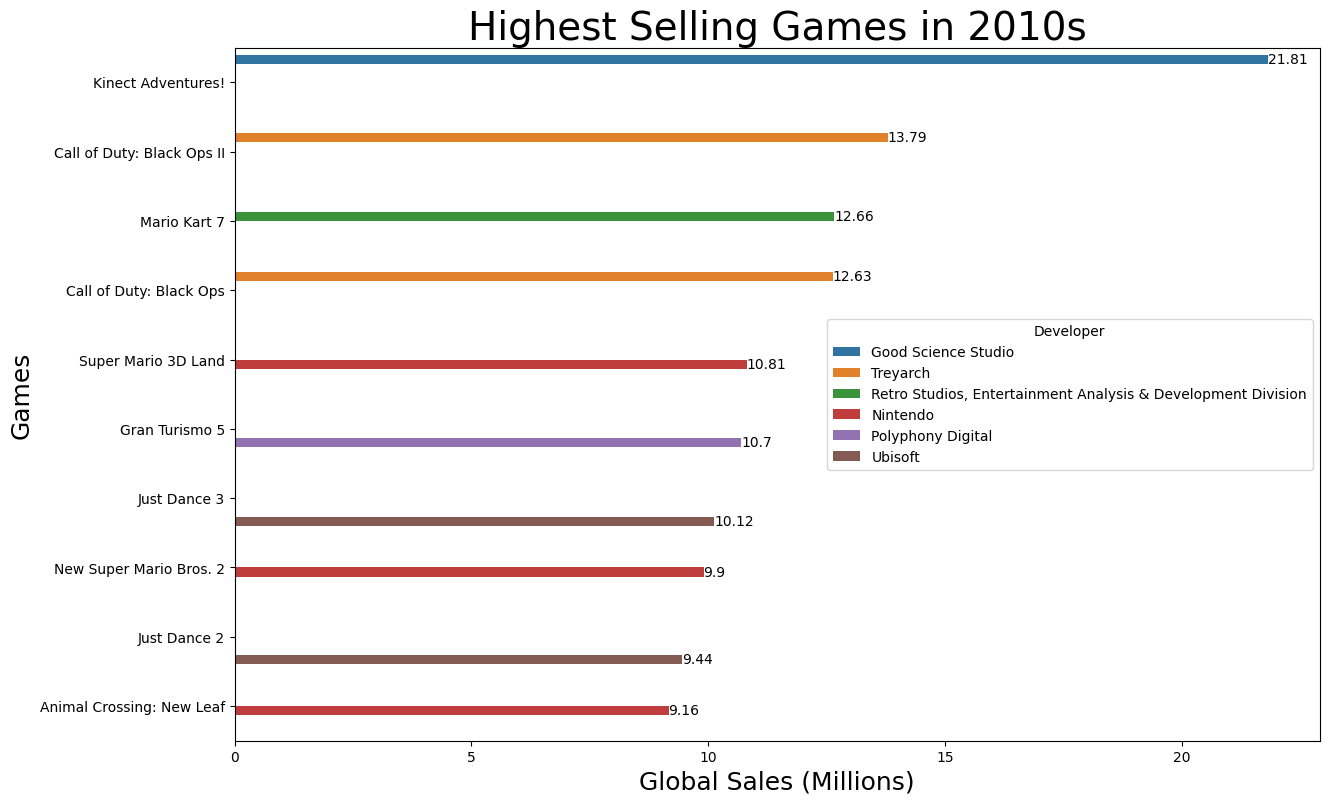

In [ ]:
ax = sns.barplot(x = 'Global_Sales', y = "Name", data = top_10_10s, hue= "Developer")
ax.figure.set_size_inches(14, 9)
ax.set_title("Highest Selling Games in 2010s", fontsize = 28)
ax.set_ylabel('Games', fontsize = 18)
ax.set_xlabel('Global Sales (Millions)', fontsize = 18)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In the 2010s, the highest selling game globally was Kinect Adventures developed by Good Science Studio. Following was Call of Duty: Black Ops II developed by Treyarch, and Mario Kart 7 took third place.

Critic_Score: Min = 29.0, Max= 98.0
User_Score: Min = 30.0, Max= 96.0
Critic_Score: Mean = 70.49357405140759, Median = 72.0
User_Score: Mean = 72.73852509179926, Median = 75.0
Average amount of critics: 28.22873317013464
Average amount of users: 107.82267441860465


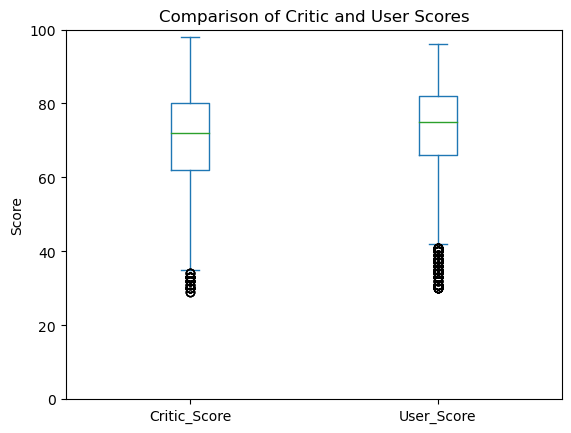

In [3]:
# load data from a CSV file
df = pd.read_csv('VGSales.csv')

# convert User_Score to be out of 100
df['User_Score'] = df['User_Score'] * 10

# print the minimum and maximum values of both columns
print(f"Critic_Score: Min = {df['Critic_Score'].min()}, Max= {df['Critic_Score'].max()}")
print(f"User_Score: Min = {df['User_Score'].min()}, Max= {df['User_Score'].max()}")

# create a boxplot
box = df[['Critic_Score', 'User_Score']].plot(kind='box')

# add median and mean lines
#box.axhline(df['Critic_Score'].median(), color='r', linestyle='--', alpha=0.3)
#box.axhline(df['User_Score'].median(), color='g', linestyle='--', alpha=0.3)

#box.axhline(df['Critic_Score'].mean(), color='b', linestyle='-', alpha=0.3)
#box.axhline(df['User_Score'].mean(), color='m', linestyle='-', alpha=0.3)

# set the y-axis limits
box.set_ylim(0, 100)

# set the labels
plt.title('Comparison of Critic and User Scores')
plt.ylabel('Score')

# print median and mode values
print(f"Critic_Score: Mean = {df['Critic_Score'].mean()}, Median = {df['Critic_Score'].median()}")
print(f"User_Score: Mean = {df['User_Score'].mean()}, Median = {df['User_Score'].median()}")
print(f"Average amount of critics: {df['Critic_Count'].mean()}")
print(f"Average amount of users: {df['User_Count'].mean()}")
# show the plot
plt.show()

The user and critic scores are very similar, the critics had a range in values of 29 - 98 while the users had a range of 30 - 96. The mean and median of the user scores were slightly higher than the critics where the users had a mean of about 73 and the critics had a mean of about 70, and a user median of 75 vs. the critics 72. The largest difference these groups had were the average amount of people scoring per game, the critics averaged 28 inputs while the users on average heard from 108 seperate people.

The correlation coefficient between Critic Score and User Score is 0.54


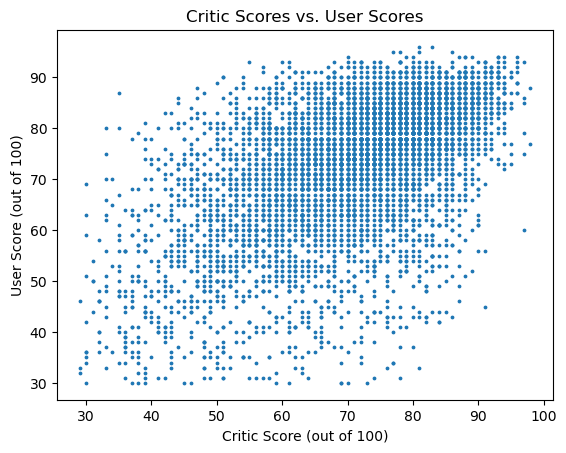

In [4]:
# create a scatter plot
plt.scatter(df['Critic_Score'], df['User_Score'], s = 3)

# set the title and axis labels
plt.title('Critic Scores vs. User Scores')
plt.xlabel('Critic Score (out of 100)')
plt.ylabel('User Score (out of 100)')

# calculate the correlation coefficient
corr = df['Critic_Score'].corr(df['User_Score'])

# print the correlation coefficient
print(f"The correlation coefficient between Critic Score and User Score is {corr:.2f}")

# show the plot
plt.show()

The critics' and users' score have a moderate positive correlation of .54. So users and critics tend to vote similarly. However, it is only a moderate correlations so many of the games that users vote high critics vote low and vice versa as we can see for example some games that are rated 70 or 80 by critics but only 30 by users.